对于线性回归的问题，我们常用如下公式来表示数据：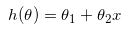
我们实际需要求解的就是θ1和θ2这两个参数的最优值。

什么情况下的线是最优的呢？我们引入成本函数如下，成本函数就是计算线上到所有散点的距离之和，只要能保证这个距离之和最小就是我们想要的最终结果。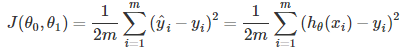

怎么计算这个成本函数最小值呢？首先我们先看看这一类函数的图形化表现形式：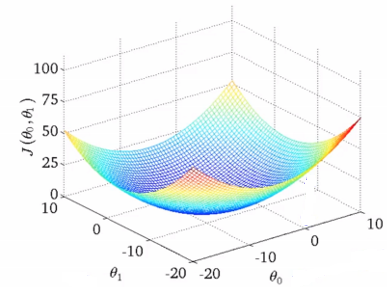
其实我们需要求解的就是这个图形的最低点。

怎么计算最低点呢？我们引入梯度算法来进行求解。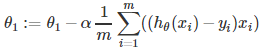
这样一来我们需要做的就是用代码去实现这些方程。


In [3]:
#numpy 存储和处理大型矩阵
#pandas 基于numpy的一种工具，用于数据分析。
#matplotlib 主要是用于绘图
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fmin_cg
%matplotlib inline

Text(0.5,1,'relationshiop of population and gdp')

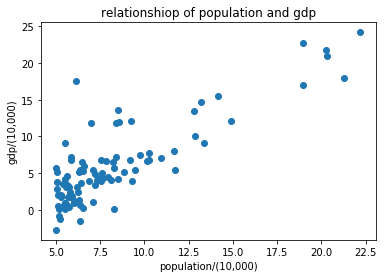

In [4]:
#加载数据,并将数据以散点图的形式展示出来
#这里的数据表示的是人口和GDP的关系, 以 n*2的矩阵形式存放于文件中
data = pd.read_csv('data_for_linearregression.txt', names = ['population', 'gdp'])

#用散点图将数据打印出来
plt.scatter(data['population'], data['gdp'])
plt.xlabel("population/(10,000)")
plt.ylabel("gdp/(10,000)")
plt.title("relationshiop of population and gdp")

In [5]:
#先把x，y，θ的输入数据分别用矩阵表示出来

#x对应的是population
x = data.as_matrix(columns = ['population'])

#y对应的是gdp
y = data.as_matrix(columns = ['gdp'])

#θ的值我们要比x多一个，作为偏置单元
theta_ini = np.zeros(x.shape[1] + 1)

#记录一下样本的个数
m = x.shape[0]


拿到数据之后，我们先做特征缩放，就是降低数据的大小，是的能更快速的在梯度算法中进行收敛得到最终的数据
特征缩放的方程如下：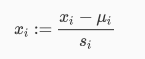

其中，μi是所有特征值的平均值，si是特征值的标准偏差。

Text(0.5,1,'Normalized Data')

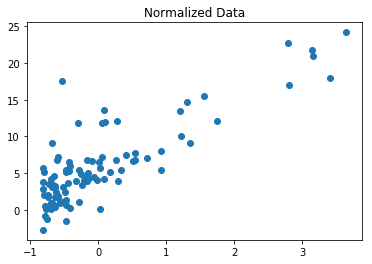

In [6]:
#特征缩放
mean = x.mean()
s = x.std()
x = (x - mean) / s


#在展示一下缩放后的数据
plt.scatter(x,y)
plt.title('Normalized Data')

x需要增加一列1（X0），作为偏置量便于计算θ值。
然后为了计算梯度算法的最优值，我们要先分别定义几个函数，分别表示成本函数，梯度算法。

Optimization terminated successfully.
         Current function value: 4.476971
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
value of θ is  [5.83913505 4.59304113]


Text(0,0.5,'gdp/(10,000)')

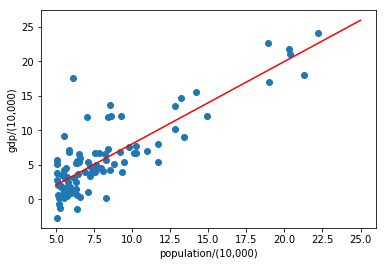

In [7]:
#给x数据增加一列
def add_column_ones(x):
    x = np.append(np.ones((x.shape[0], 1)), x, axis = 1)
    return x
x= add_column_ones(x)

#成本函数
def cost_function(theta, x, y):
    theta = theta.reshape((len(theta), 1))
    pred = np.dot(x, theta)
    J = np.mean((pred - y) ** 2) / 2
    return J

#梯度算法函数
def gradient(theta, x, y):
    theta = theta.reshape((len(theta), 1))
    pred = np.dot(x, theta)
    loss = pred - y
    grad = np.dot(x.T, loss) / m
    return grad.flatten()

#预测函数
def prediction(theta, x, mu = 0, sigma = 1):
    theta = theta.reshape((len(theta), 1))
    x = x.reshape(len(x), 1)
    x = (x - mu) / sigma
    x = add_column_ones(x)
    pred = np.dot(x, theta)
    return pred

#万事具备，只差执行计算,这里使用的是scipy.optimize中的fmin_cg函数直接去计算最优值
theta, thetas = fmin_cg(cost_function, theta_ini, fprime = gradient, 
                         args = (x, y), retall = 1, disp = 1)
#将最终的数据打印出来
population = np.linspace(5,25,100)
pred = prediction(theta, population, mean, s)
print ('value of θ is ', theta)
plt.scatter(data['population'], data['gdp'])
plt.plot(population, pred, 'r')
plt.xlabel('population/(10,000)')
plt.ylabel('gdp/(10,000)')